# **1. Baseline CNN Model**

In [58]:
# Import lib.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Load the CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [60]:
# Check data set shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [61]:
# Convert labels to 1D
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
print(y_train)
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [62]:
# Define class name
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

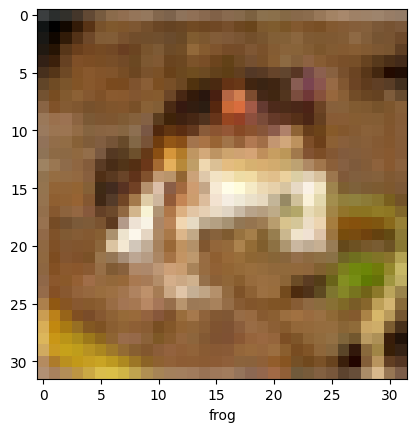

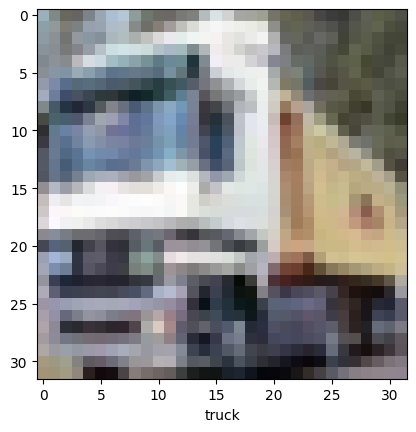

In [63]:
# visulize samele img
def plot_sample(X,y, index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

In [64]:
# Normalize the img
X_train = X_train / 255.0
X_test = X_test / 255.0

In [65]:
# CNN Model
cnn = models.Sequential([
    # first conv. layer
    layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(32, 32, 3)
    ),

    # max pool layer
    layers.MaxPooling2D((2, 2)),

    # second conv. layer
    layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    ),

    # max pool layer
    layers.MaxPooling2D((2, 2)),

    # Flatten 2d features into 1d
    layers.Flatten(),

    # dense layer
    layers.Dense(64, activation="relu"),

    # output layer
    layers.Dense(10, activation="softmax") # 10 b'cause there are 10 samples

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Compile the model
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

In [67]:
# Train model
history = cnn.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3634 - loss: 1.7344 - val_accuracy: 0.5618 - val_loss: 1.2393
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5807 - loss: 1.1937 - val_accuracy: 0.6369 - val_loss: 1.0670
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6459 - loss: 1.0268 - val_accuracy: 0.6527 - val_loss: 1.0059
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6739 - loss: 0.9430 - val_accuracy: 0.6709 - val_loss: 0.9657
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6975 - loss: 0.8762 - val_accuracy: 0.6829 - val_loss: 0.9236
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7119 - loss: 0.8261 - val_accuracy: 0.6633 - val_loss: 0.9949
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7282 - loss: 0.7892 - val_accuracy: 0.6851 - val_loss: 0.9368
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7459 - loss: 0.7370 -

In [68]:
# Evaluate on test data
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6955 - loss: 0.9229


[0.9313190579414368, 0.6915000081062317]

In [69]:
# Predictions
y_pred = cnn.predict(X_test)

# Convert probability to class label
y_classes = np.argmax(y_pred, axis=1)

print("Predicted:", y_classes[:5])
print("Actual:", y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: [3 8 9 0 4]
Actual: [3 8 8 0 6]


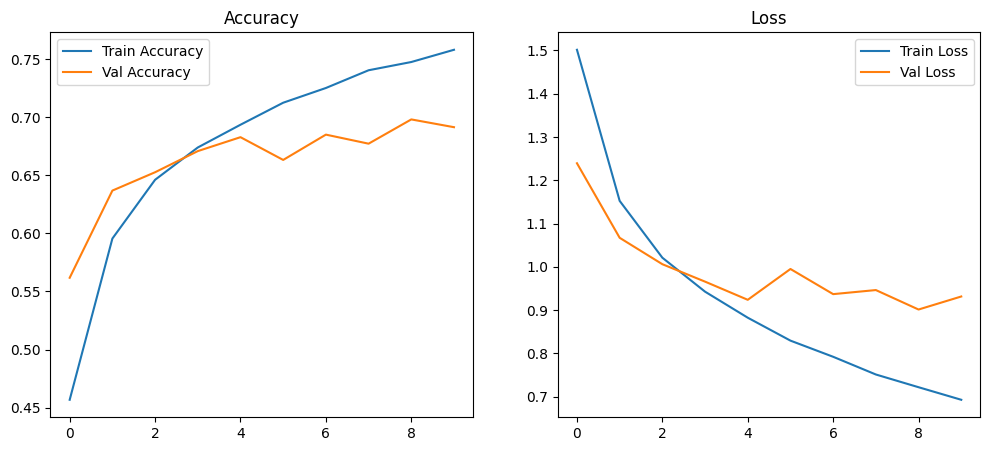

In [70]:
plt.figure(figsize=(12,5))
# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

# **2. Improved CNN Model**

In [71]:
# Import lib.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [72]:
# Check GPU
print(f'GPU Available : {tf.config.list_physical_devices("GPU")}')

GPU Available : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [73]:
# Load the CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [74]:
# Check data set shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [75]:
# Convert labels to 1D
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
print(y_train)
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [76]:
# Define class name
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

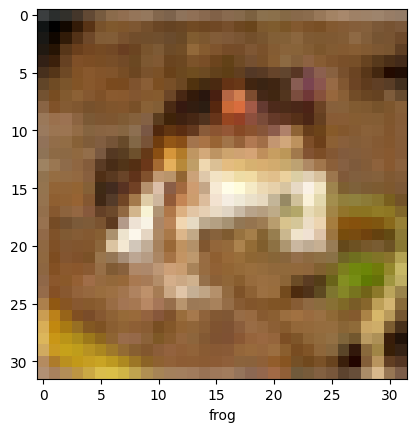

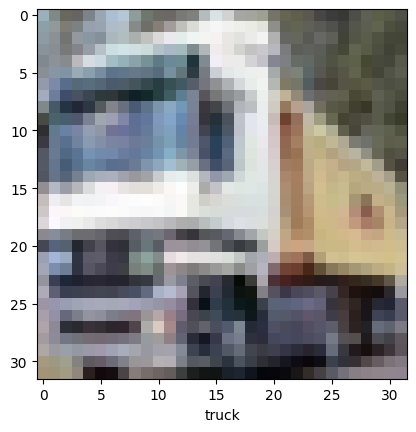

In [77]:
# visulize sample img
def plot_sample(X,y, index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

In [78]:
# Normalize the img
X_train = X_train / 255.0
X_test = X_test / 255.0

In [79]:
# Data Augmentaion
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [2]:
# Create Model
def simple_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))

    x = data_augmentation(inputs)

    # Block 1
    x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2,2))(x)

    # Block 2
    x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2,2))(x)

    # Block 3
    x = layers.Conv2D(128, (3,3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [81]:
# Instantiate and Compile the Model
model = simple_cnn()
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

In [87]:
# Train
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7402 - loss: 0.7377 - val_accuracy: 0.7416 - val_loss: 0.7643 - learning_rate: 6.2500e-05
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7442 - loss: 0.7325 - val_accuracy: 0.7427 - val_loss: 0.7581 - learning_rate: 6.2500e-05
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7481 - loss: 0.7288 - val_accuracy: 0.7409 - val_loss: 0.7672 - learning_rate: 6.2500e-05
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7437 - loss: 0.7255 - val_accuracy: 0.7462 - val_loss: 0.7519 - learning_rate: 6.2500e-05
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7438 - loss: 0.7345 - val_accuracy: 0.7427 - val_loss: 0.7642 - learning_rate: 6.2500e-05
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7469 - loss: 0.7246 - val_accuracy: 0.7451 - val_loss: 0.7543 - learning_rate: 6.2500e-05
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc

In [84]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 73.77%


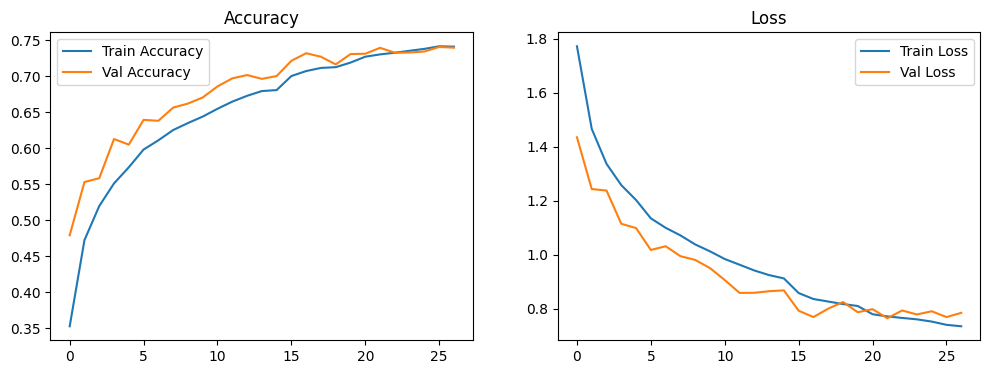

In [85]:

# Plot history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()